In [1]:
# Import the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m14/datasets/bank_marketing.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,83,retired,divorced,primary,no,0,no,no,telephone,31,may,664,1,77.0,3,success,no
1,32,technician,married,secondary,no,1242,yes,no,NaN,2,jun,183,3,NaN,0,NaN,no
2,38,blue-collar,single,secondary,no,68,no,no,NaN,5,jun,90,2,NaN,0,NaN,no
3,30,services,single,secondary,no,677,yes,no,cellular,21,nov,108,1,NaN,0,NaN,no
4,66,retired,married,primary,no,2173,no,no,cellular,15,jul,178,1,181.0,5,failure,no


In [2]:
# Setup X and y variables
X = df.drop(columns='y')
y = df['y'].values.reshape(-1,1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)
X_train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,25431.000000,25431.000000,25431.000000,25431.000000,25431.000000,4655.000000,25431.000000
mean,40.913806,1353.540128,15.836381,257.774684,2.780937,226.843824,0.581534
std,10.617230,3018.184488,8.345164,258.556998,3.115439,117.716936,1.928374
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,33.000000,71.000000,8.000000,103.000000,1.000000,133.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,196.000000,0.000000
75%,48.000000,1403.000000,21.000000,318.000000,3.000000,330.500000,0.000000
max,95.000000,98417.000000,31.000000,3785.000000,63.000000,871.000000,51.000000


# Missing Values

In [3]:
# Find the percentage of null values in each column
X_train.isna().sum()/len(X_train)

age          0.000000
job          0.006685
marital      0.000000
education    0.042546
default      0.000000
balance      0.000000
housing      0.000000
loan         0.000000
contact      0.289214
day          0.000000
month        0.000000
duration     0.000000
campaign     0.000000
pdays        0.816956
previous     0.000000
poutcome     0.817074
dtype: float64

In [4]:
# Explore each column with missing values to determine the best fill strategy
# First the job column
X_train['job'].value_counts()

job
blue-collar      5493
management       5286
technician       4281
admin.           2907
services         2327
retired          1289
self-employed     913
entrepreneur      826
unemployed        729
housemaid         689
student           521
Name: count, dtype: int64

In [5]:
# The job column is varied and the number of missing values is small
# It might suffice to fill the missing values with "unknown"
# We'll make a function to handle this.
def fill_job(X_data):
    X_data['job'] = X_data['job'].fillna('unknown')
    return X_data

In [6]:
# Education is next
X_train['education'].value_counts()

education
secondary    13076
tertiary      7436
primary       3837
Name: count, dtype: int64

In [7]:
X_train.loc[X_train['education'].isna()].describe()

,age,balance,day,duration,campaign,pdays,previous
count,1082.000000,1082.000000,1082.000000,1082.000000,1082.000000,184.000000,1082.000000
mean,44.231978,1613.357671,15.695933,255.985213,2.949168,224.646739,0.459335
std,12.209502,3411.738876,8.737987,246.804840,4.138916,119.843432,1.429409
min,18.000000,-1137.000000,1.000000,4.000000,1.000000,2.000000,0.000000
25%,35.000000,132.000000,8.000000,97.000000,1.000000,131.000000,0.000000
50%,44.000000,596.000000,16.000000,175.000000,2.000000,190.500000,0.000000
75%,53.000000,1694.500000,22.000000,322.250000,3.000000,321.250000,0.000000
max,93.000000,64343.000000,31.000000,1812.000000,63.000000,687.000000,13.000000


In [8]:
X_train.loc[X_train['education'].isna(), 'job'].value_counts()

job
blue-collar      266
technician       145
management       133
student          102
admin.            97
services          88
retired           71
entrepreneur      44
self-employed     23
housemaid         20
unemployed        19
Name: count, dtype: int64

In [9]:
# The vast majority of rows missing an education value
# have a job which wouldn't require a higher education
# Lets fillna for education with 'primary', but 'unknown'
# might be a good choice as well

def fill_education(X_data):
    X_data['education'] = X_data['education'].fillna('primary')
    return X_data

In [10]:
# Now for the contact column
X_train['contact'].value_counts()

contact
cellular     16422
telephone     1654
Name: count, dtype: int64

In [11]:
X_train.loc[X_train['contact'].isna()].describe()

,age,balance,day,duration,campaign,pdays,previous
count,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,46.000000,7355.000000
mean,40.612237,1168.443916,15.353909,253.984908,2.800544,441.369565,0.028552
std,9.437023,2479.096549,8.459134,261.814698,3.374834,251.050005,0.632499
min,20.000000,-3313.000000,1.000000,0.000000,1.000000,75.000000,0.000000
25%,33.000000,49.000000,8.000000,100.000000,1.000000,177.750000,0.000000
50%,39.000000,380.000000,15.000000,179.000000,2.000000,416.500000,0.000000
75%,48.000000,1238.000000,21.000000,314.000000,3.000000,677.500000,0.000000
max,61.000000,45141.000000,31.000000,3785.000000,63.000000,838.000000,41.000000


In [12]:
X_train.loc[X_train['contact'].isna(), 'education'].value_counts()

education
secondary    4045
tertiary     1485
primary      1442
Name: count, dtype: int64

In [13]:
X_train.loc[X_train['contact'].isna(), 'job'].value_counts()

job
blue-collar      2205
management       1122
technician       1086
admin.            879
services          789
retired           279
entrepreneur      244
self-employed     228
housemaid         200
unemployed        180
student            77
Name: count, dtype: int64

In [14]:
# This one is harder to find; we'll just fillna
# using 'unknown' for this one

def fill_contact(X_data):
    X_data['contact'] = X_data['contact'].fillna('unknown')
    return X_data


<Axes: ylabel='Frequency'>

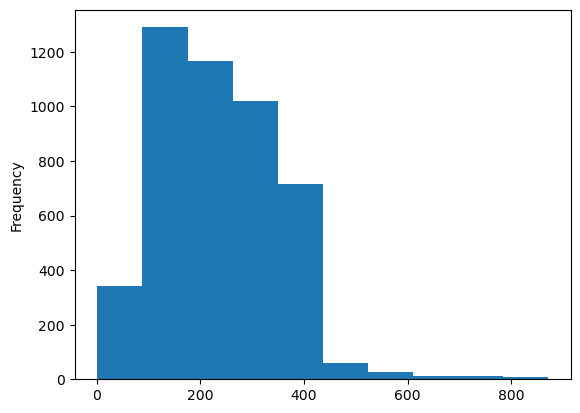

In [15]:
# Next is pdays
# This column says how many days it has been since the last 
# marketing contact for this client

X_train['pdays'].plot(kind='hist')

In [16]:
X_train.loc[X_train['pdays'].isna()].describe()

,age,balance,day,duration,campaign,pdays,previous
count,20776.000000,20776.000000,20776.000000,20776.000000,20776.000000,0.0,20776.0
mean,40.902821,1303.819407,16.190653,258.180449,2.942674,NaN,0.0
std,10.435515,2941.903685,8.393923,264.532982,3.341881,NaN,0.0
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,NaN,0.0
25%,33.000000,54.000000,9.000000,101.000000,1.000000,NaN,0.0
50%,39.000000,413.000000,17.000000,177.000000,2.000000,NaN,0.0
75%,48.000000,1343.000000,22.000000,318.000000,3.000000,NaN,0.0
max,95.000000,98417.000000,31.000000,3785.000000,63.000000,NaN,0.0


In [17]:
# Hmm... previous has some interesting output, lets explore that
X_train.loc[X_train['pdays'].isna(), 'previous'].value_counts()

previous
0    20776
Name: count, dtype: int64

In [18]:
# According to the information about the dataset,
# a zero in the 'previous' column means that this client
# has not been contacted before! Lets put a -1 in place
# of the NaNs to indicate this importance to the model.

def fill_pdays(X_data):
    X_data['pdays'] = X_data['pdays'].fillna(-1)
    return X_data

In [19]:
# Lastly is poutcome

X_train['poutcome'].value_counts()

poutcome
failure    2759
other      1048
success     845
Name: count, dtype: int64

In [20]:
# The number of missing values in this column 
# closely matched that of pdays
# Lets check the 'previous' column

X_train.loc[X_train['poutcome'].isna(), 'previous'].value_counts()

previous
0    20776
2        2
7        1
Name: count, dtype: int64

In [21]:
# Since the vast majority of missing data didn't have a previous
# campaign, we can fill the data with 'nonexistent'. 

def fill_poutcome(X_data):
    X_data['poutcome'] = X_data['poutcome'].fillna('nonexistent')
    return X_data

In [22]:
# Lets combine all our missing data functions into a single function
def fill_missing(X_data):
    X_data = fill_job(X_data)
    X_data = fill_education(X_data)
    X_data = fill_contact(X_data)
    X_data = fill_pdays(X_data)
    X_data = fill_poutcome(X_data)
    return X_data

In [23]:
# Lets apply this fill missing function to our data before 
# moving on to encoding
X_train_filled = fill_missing(X_train)
X_test_filled = fill_missing(X_test)

# Categorical Variables

In [24]:
X_train_filled.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
2544,34,blue-collar,married,secondary,no,328,yes,yes,cellular,21,nov,18,7,-1.0,0,nonexistent
3891,30,technician,married,secondary,no,484,yes,no,unknown,6,may,703,1,-1.0,0,nonexistent
19464,42,entrepreneur,divorced,secondary,no,31,no,no,unknown,18,jun,120,1,-1.0,0,nonexistent
31170,27,management,single,tertiary,no,3,yes,yes,cellular,22,jul,506,1,-1.0,0,nonexistent
22216,30,management,single,secondary,no,19,no,no,cellular,26,aug,191,2,-1.0,0,nonexistent


In [25]:
# First is job
X_train_filled['job'].value_counts()

job
blue-collar      5493
management       5286
technician       4281
admin.           2907
services         2327
retired          1289
self-employed     913
entrepreneur      826
unemployed        729
housemaid         689
student           521
unknown           170
Name: count, dtype: int64

In [26]:
# Lots of unique values, not ordinal data
# Lets convert to no more than 5 categories

encode_job = OneHotEncoder(max_categories=5, handle_unknown='infrequent_if_exist', sparse_output=False)

# Train the encoder
encode_job.fit(X_train_filled['job'].values.reshape(-1, 1))

OneHotEncoder(handle_unknown='infrequent_if_exist', max_categories=5,
              sparse_output=False)

In [27]:
# Next is marital
X_train_filled['marital'].value_counts()

marital
married     15246
single       7204
divorced     2981
Name: count, dtype: int64

In [28]:
# Only three values; lets use two OneHotEncoded columns
# remembering to choose options for unknown values
encode_marital = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Train the encoder
encode_marital.fit(X_train_filled['marital'].values.reshape(-1, 1))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [29]:
# Next is education
X_train_filled['education'].value_counts()

education
secondary    13076
tertiary      7436
primary       4919
Name: count, dtype: int64

In [30]:
# This is ordinal! Lets use the ordinal encoder
# We'll set any unknown values to -1
encode_education = OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary']], handle_unknown='use_encoded_value', unknown_value=-1)

# Train the encoder
encode_education.fit(X_train_filled['education'].values.reshape(-1, 1))

OrdinalEncoder(categories=[['primary', 'secondary', 'tertiary']],
               handle_unknown='use_encoded_value', unknown_value=-1)

In [31]:
# Next is default
X_train_filled['default'].value_counts()

default
no     24978
yes      453
Name: count, dtype: int64

In [32]:
# Lets make this an Ordinal column
encode_default = OrdinalEncoder(categories=[['no', 'yes']], handle_unknown='use_encoded_value', unknown_value=-1)

# Train the encoder
encode_default.fit(X_train_filled['default'].values.reshape(-1, 1))

OrdinalEncoder(categories=[['no', 'yes']], handle_unknown='use_encoded_value',
               unknown_value=-1)

In [33]:
# Next is housing
X_train_filled['housing'].value_counts()

housing
yes    14119
no     11312
Name: count, dtype: int64

In [34]:
# Lets make this an Ordinal column
encode_housing= OrdinalEncoder(categories=[['no', 'yes']], handle_unknown='use_encoded_value', unknown_value=-1)

# Train the encoder
encode_housing.fit(X_train_filled['housing'].values.reshape(-1, 1))

OrdinalEncoder(categories=[['no', 'yes']], handle_unknown='use_encoded_value',
               unknown_value=-1)

In [35]:
# Next is loan
X_train_filled['loan'].value_counts()

loan
no     21348
yes     4083
Name: count, dtype: int64

In [36]:
# Lets make this an Ordinal column
encode_loan = OrdinalEncoder(categories=[['no', 'yes']], handle_unknown='use_encoded_value', unknown_value=-1)

# Train the encoder
encode_loan.fit(X_train_filled['loan'].values.reshape(-1, 1))

OrdinalEncoder(categories=[['no', 'yes']], handle_unknown='use_encoded_value',
               unknown_value=-1)

In [37]:
# Next is contact
X_train_filled['contact'].value_counts()

contact
cellular     16422
unknown       7355
telephone     1654
Name: count, dtype: int64

In [38]:
# Lets use two OneHotEncoded columns
encode_contact = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Train the encoder
encode_contact.fit(X_train_filled['contact'].values.reshape(-1, 1))

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [39]:
# Next is month
X_train_filled['month'].value_counts()

month
may    7735
jul    3845
aug    3512
jun    3039
nov    2203
apr    1666
feb    1492
jan     794
oct     426
sep     330
mar     264
dec     125
Name: count, dtype: int64

In [40]:
# This month seems ordinal by may not behave that way...
# Lets use ordinal for now, but consider experimenting with this!
encode_month = OrdinalEncoder(categories=[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']], handle_unknown='use_encoded_value', unknown_value=-1)

# Train the encoder
encode_month.fit(X_train_filled['month'].values.reshape(-1, 1))

OrdinalEncoder(categories=[['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul',
                            'aug', 'sep', 'oct', 'nov', 'dec']],
               handle_unknown='use_encoded_value', unknown_value=-1)

In [41]:
# Next is the poutcome column
X_train_filled['poutcome'].value_counts()

poutcome
nonexistent    20779
failure         2759
other           1048
success          845
Name: count, dtype: int64

In [42]:
# Lets use OneHotEncoding for this
encode_poutcome = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# Train the encoder
encode_poutcome.fit(X_train_filled['poutcome'].values.reshape(-1, 1))


OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [43]:
# Combine the encoders into a function
# Make sure to return a dataframe
def encode_categorical(X_data):
    # Separate numeric columns
    X_data_numeric = X_data.select_dtypes(include='number').reset_index()

    # Multicolumn encoders first
    job_encoded_df = pd.DataFrame(encode_job.transform(X_data['job'].values.reshape(-1, 1)), columns=encode_job.get_feature_names_out())
    marital_encoded_df = pd.DataFrame(encode_marital.transform(X_data['marital'].values.reshape(-1, 1)), columns=encode_marital.get_feature_names_out())
    contact_encoded_df = pd.DataFrame(encode_contact.transform(X_data['contact'].values.reshape(-1, 1)), columns=encode_contact.get_feature_names_out())
    poutcome_encoded_df = pd.DataFrame(encode_poutcome.transform(X_data['poutcome'].values.reshape(-1, 1)), columns=encode_poutcome.get_feature_names_out())

    # Concat all dfs together
    dfs = [X_data_numeric, job_encoded_df, marital_encoded_df, contact_encoded_df, poutcome_encoded_df]
    X_data_encoded = pd.concat(dfs, axis=1)

    # Add single column encoders
    X_data_encoded['education'] = encode_education.transform(X_data['education'].values.reshape(-1, 1))
    X_data_encoded['default'] = encode_default.transform(X_data['default'].values.reshape(-1, 1))
    X_data_encoded['housing'] = encode_housing.transform(X_data['housing'].values.reshape(-1, 1))
    X_data_encoded['loan'] = encode_loan.transform(X_data['loan'].values.reshape(-1, 1))
    X_data_encoded['month'] = encode_month.transform(X_data['month'].values.reshape(-1, 1))
    
    return X_data_encoded

In [44]:
# Apply the encoding function to both training and testing
X_train_encoded = encode_categorical(X_train_filled)
X_test_encoded = encode_categorical(X_test_filled)

In [45]:
# Check the final X_train data
X_train_encoded.head()

,index,age,balance,day,duration,campaign,pdays,previous,x0_admin.,x0_blue-collar,...,x0_telephone,x0_unknown,x0_nonexistent,x0_other,x0_success,education,default,housing,loan,month
0,2544,34,328,21,18,7,-1.0,0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,10.0
1,3891,30,484,6,703,1,-1.0,0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0
2,19464,42,31,18,120,1,-1.0,0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0
3,31170,27,3,22,506,1,-1.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,6.0
4,22216,30,19,26,191,2,-1.0,0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,7.0


In [46]:
# Wait! Don't forget the y data!
y_train

array([['no'],
       ['yes'],
       ['no'],
       ...,
       ['no'],
       ['no'],
       ['no']], dtype=object)

In [47]:
# Create a OneHotEncoder
encode_y = OneHotEncoder(drop='first', sparse_output=False)

# Train the encoder
encode_y.fit(y_train)

# Apply it to both y_train and y_test
# Use np.ravel to reshape for logistic regression
y_train_encoded = np.ravel(encode_y.transform(y_train))
y_test_encoded = np.ravel(encode_y.transform(y_test))
y_train_encoded

array([0., 1., 0., ..., 0., 0., 0.])

In [48]:
# Create and train an SVC model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=500)
model.fit(X_train_encoded, y_train_encoded)

RandomForestClassifier(n_estimators=500)

In [49]:
# Check the model's balanced accuracy on the test set

y_test_pred = model.predict(X_test_encoded)
print(balanced_accuracy_score(y_test_encoded, y_test_pred))

0.690754700218917


In [50]:
# Check the model's balanced accuracy on the training set

y_train_pred = model.predict(X_train_encoded)
print(balanced_accuracy_score(y_train_encoded, y_train_pred))

1.0


In [51]:
# We overfit! Lets try varying the max depth

models = {'train_score': [], 'test_score': [], 'max_depth': []}

for depth in range(1,10):
    models['max_depth'].append(depth)
    model = RandomForestClassifier(n_estimators=500, max_depth=depth)
    model.fit(X_train_encoded, y_train_encoded)
    y_test_pred = model.predict(X_test_encoded)
    y_train_pred = model.predict(X_train_encoded)

    models['train_score'].append(balanced_accuracy_score(y_train_encoded, y_train_pred))
    models['test_score'].append(balanced_accuracy_score(y_test_encoded, y_test_pred))

models_df = pd.DataFrame(models)

<Axes: xlabel='max_depth'>

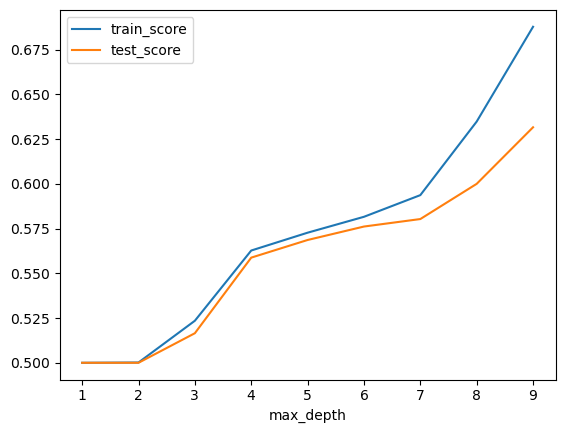

In [52]:
models_df.plot(x='max_depth')

In [53]:
# it looks like the lines start to diverge a lot after 7
# Create and train a RandomForest model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth = 7, n_estimators=100)
model.fit(X_train_encoded, y_train_encoded)

y_train_pred = model.predict(X_train_encoded)
print(balanced_accuracy_score(y_train_encoded, y_train_pred))

y_test_pred = model.predict(X_test_encoded)
print(balanced_accuracy_score(y_test_encoded, y_test_pred))

0.5970758887417116
0.586349177304231
